In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json.csv to kaggle.json.csv


{'kaggle.json.csv': b'id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365;;;;;\r\n2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365;;;;;\r\n2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355;;;;;\r\n3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,,,1,365;;;;;\r\n3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194;;;;;\r\n5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0;;;;;\r\n5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chr

In [ ]:
df = pd.read_csv("AB_NYC_2019.csv")

In [ ]:
print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [ ]:
df.dropna(inplace=True)

In [ ]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.set(rc={'figure.figsize':(10, 6)})
sns.set(rc={'figure.figsize':(6, 6)})
sns.set(rc={'figure.figsize':(10, 8)})

In [ ]:
df_AB_NYC_2019 = pd.read_csv("AB_NYC_2019.csv")
print(df_AB_NYC_2019.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [ ]:
print(df_AB_NYC_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df_AB_NYC_2019.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
average_prices_by_room_type = df_AB_NYC_2019.groupby("room_type")["price"].mean()
print(average_prices_by_room_type)

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64


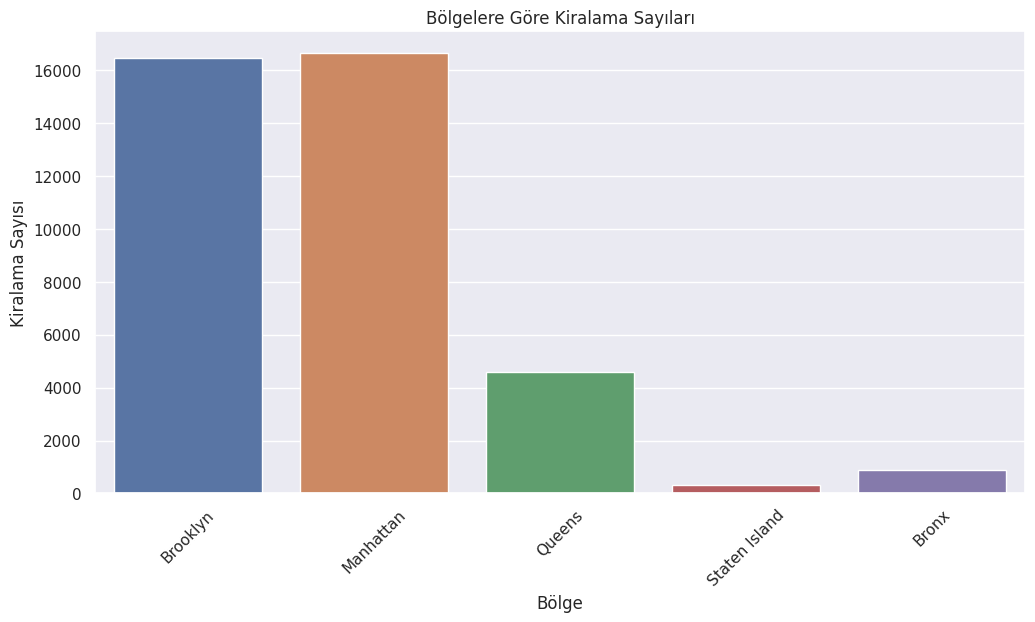

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Bölgelere Göre Kiralama Sayıları')
plt.xlabel('Bölge')
plt.ylabel('Kiralama Sayısı')
plt.xticks(rotation=45)
plt.show()

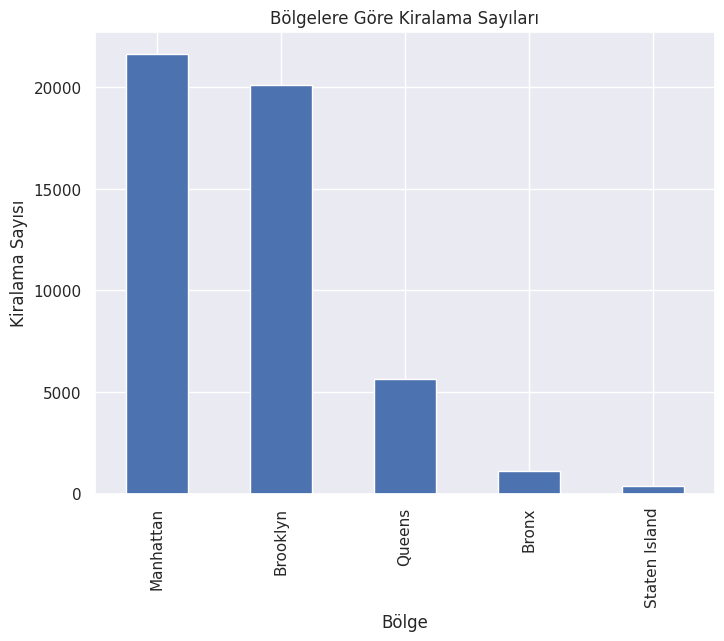

In [ ]:
rentals_by_neighbourhood = df_AB_NYC_2019["neighbourhood_group"].value_counts()
plt.figure(figsize=(8, 6))
rentals_by_neighbourhood.plot(kind='bar')
plt.title("Bölgelere Göre Kiralama Sayıları")
plt.xlabel("Bölge")
plt.ylabel("Kiralama Sayısı")
plt.show()

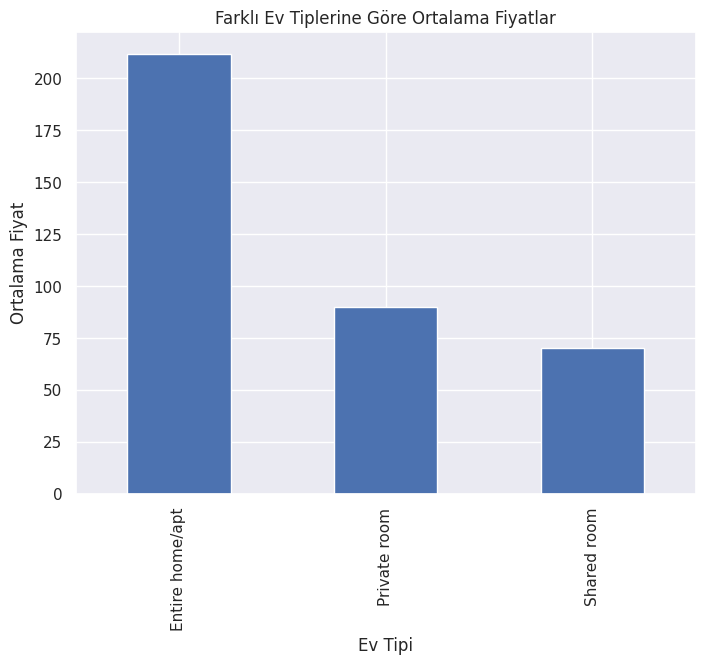

In [ ]:
average_price_by_room_type = df_AB_NYC_2019.groupby("room_type")["price"].mean()
plt.figure(figsize=(8, 6))
average_price_by_room_type.plot(kind='bar')
plt.title("Farklı Ev Tiplerine Göre Ortalama Fiyatlar")
plt.xlabel("Ev Tipi")
plt.ylabel("Ortalama Fiyat")
plt.show()

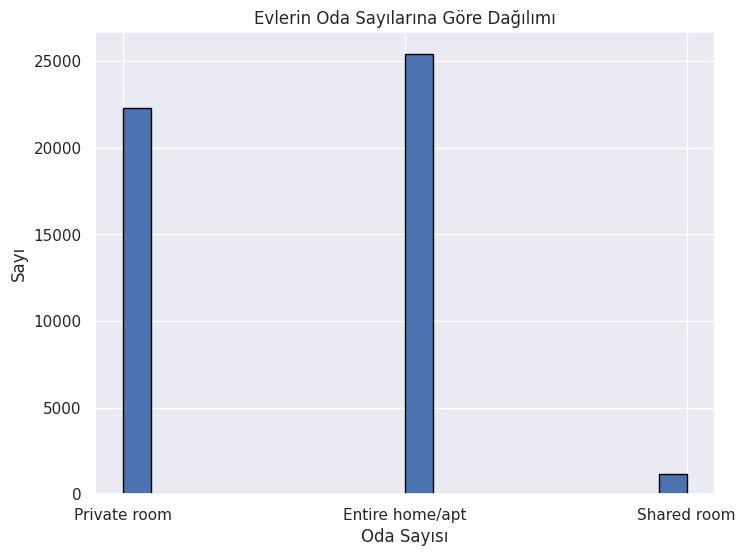

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df_AB_NYC_2019["room_type"], bins=20, edgecolor='black')
plt.title("Evlerin Oda Sayılarına Göre Dağılımı")
plt.xlabel("Oda Sayısı")
plt.ylabel("Sayı")
plt.show()

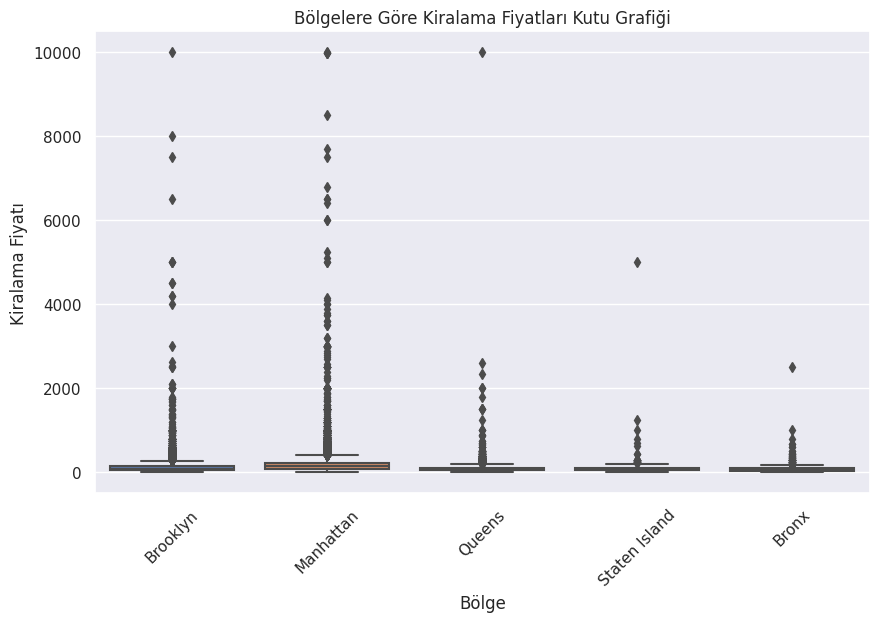

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="neighbourhood_group", y="price", data=df_AB_NYC_2019)
plt.title("Bölgelere Göre Kiralama Fiyatları Kutu Grafiği")
plt.xlabel("Bölge")
plt.ylabel("Kiralama Fiyatı")
plt.xticks(rotation=45)
plt.show()

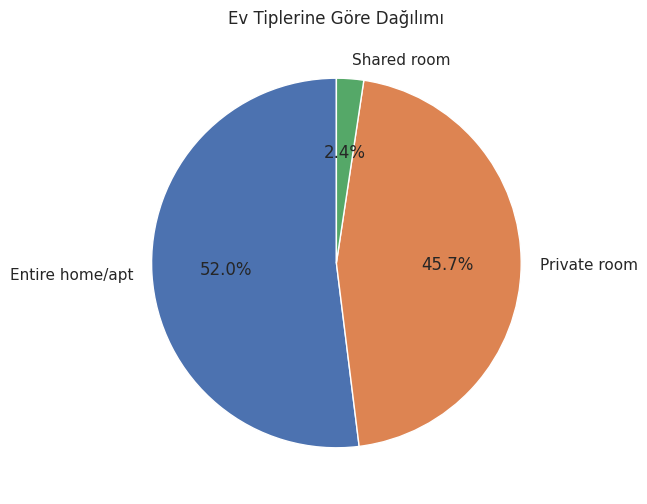

In [ ]:
plt.figure(figsize=(8, 6))
df_AB_NYC_2019["room_type"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Ev Tiplerine Göre Dağılımı")
plt.ylabel("")
plt.show()

In [ ]:
non_numeric_prices = df_AB_NYC_2019[~df_AB_NYC_2019["price"].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric_prices)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


In [ ]:
df_AB_NYC_2019 = df_AB_NYC_2019[df_AB_NYC_2019["price"].apply(lambda x: isinstance(x, (int, float)))]
df_AB_NYC_2019["last_review"] = pd.to_datetime(df_AB_NYC_2019["last_review"])

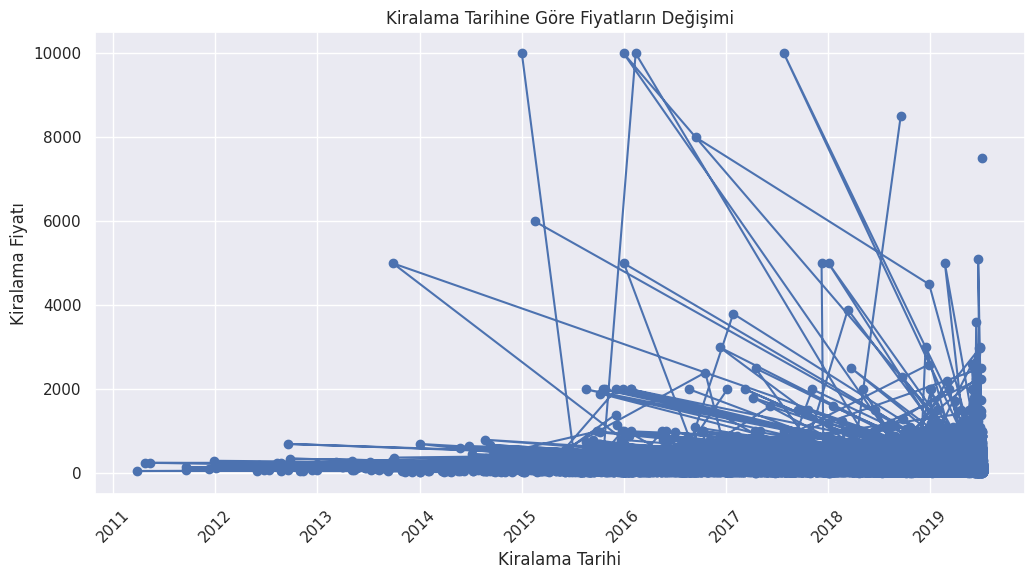

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_AB_NYC_2019["last_review"], df_AB_NYC_2019["price"], marker="o", linestyle="-")
plt.title("Kiralama Tarihine Göre Fiyatların Değişimi")
plt.xlabel("Kiralama Tarihi")
plt.ylabel("Kiralama Fiyatı")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

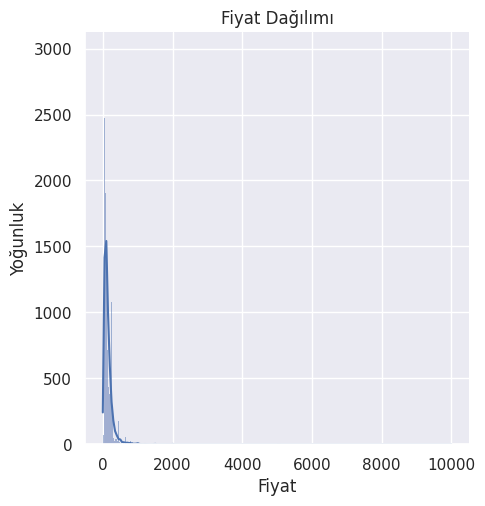

In [ ]:
sns.displot(df_AB_NYC_2019["price"], kde=True)
plt.title("Fiyat Dağılımı")
plt.xlabel("Fiyat")
plt.ylabel("Yoğunluk")
plt.show()

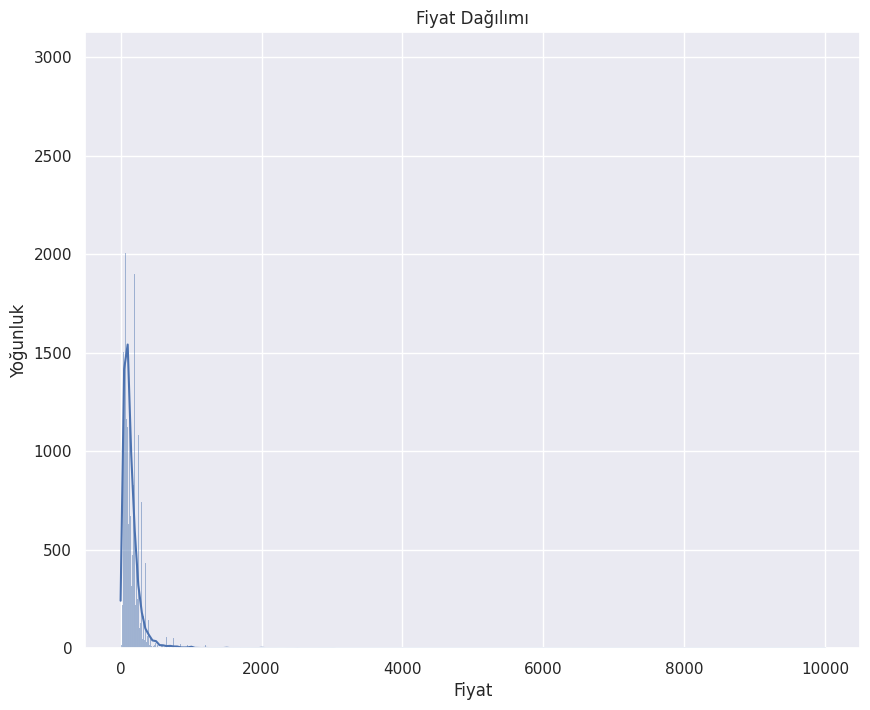

In [ ]:
sns.histplot(df_AB_NYC_2019["price"], kde=True)
plt.title("Fiyat Dağılımı")
plt.xlabel("Fiyat")
plt.ylabel("Yoğunluk")
plt.show()

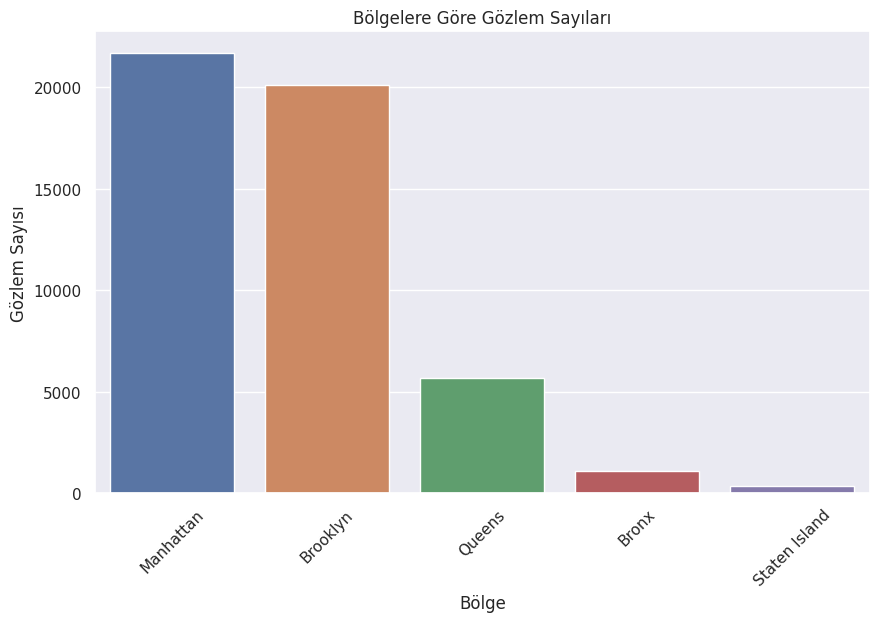

In [ ]:
neighbourhood_counts = df_AB_NYC_2019["neighbourhood_group"].value_counts()
neighbourhood_freq_table = pd.DataFrame(neighbourhood_counts).reset_index()
neighbourhood_freq_table.columns = ["neighbourhood_group", "count"]
plt.figure(figsize=(10, 6))
sns.barplot(x="neighbourhood_group", y="count", data=neighbourhood_freq_table)
plt.title("Bölgelere Göre Gözlem Sayıları")
plt.xlabel("Bölge")
plt.ylabel("Gözlem Sayısı")
plt.xticks(rotation=45)
plt.show()

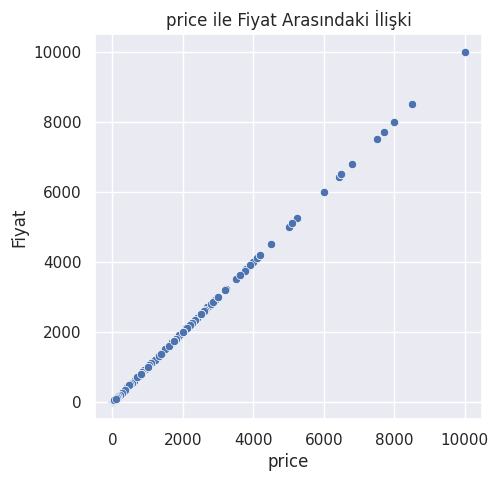

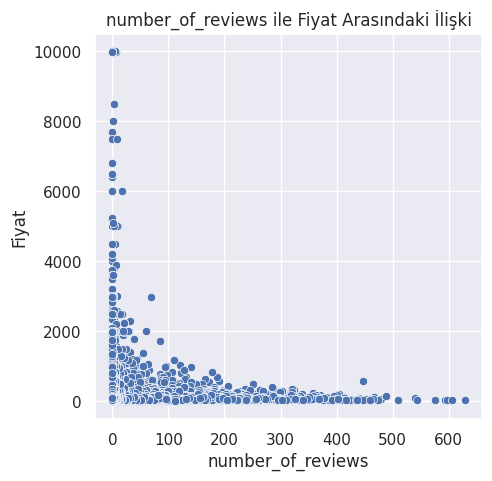

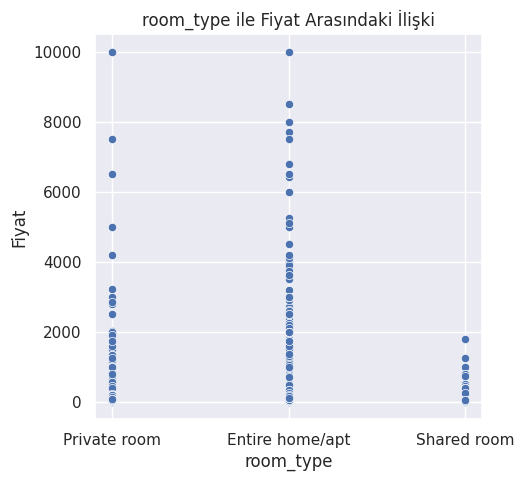

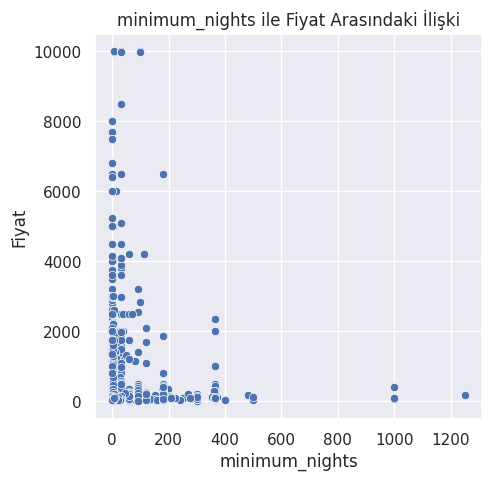

In [ ]:
cols = ["price", "number_of_reviews", "room_type", "minimum_nights"]
for col in cols:
    plt.figure(figsize=(5, 5))
    sns.scatterplot(x=col, y="price", data=df_AB_NYC_2019)
    plt.title(f"{col} ile Fiyat Arasındaki İlişki")
    plt.xlabel(col)
    plt.ylabel("Fiyat")
    plt.show()

<Axes: xlabel='price', ylabel='Density'>

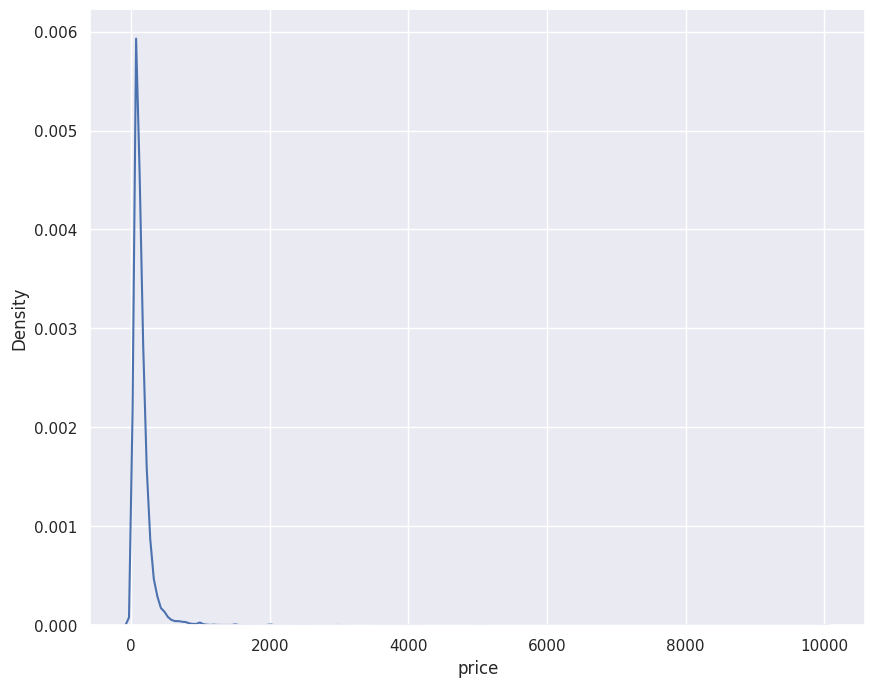

In [ ]:
sns.kdeplot(df_AB_NYC_2019["price"])

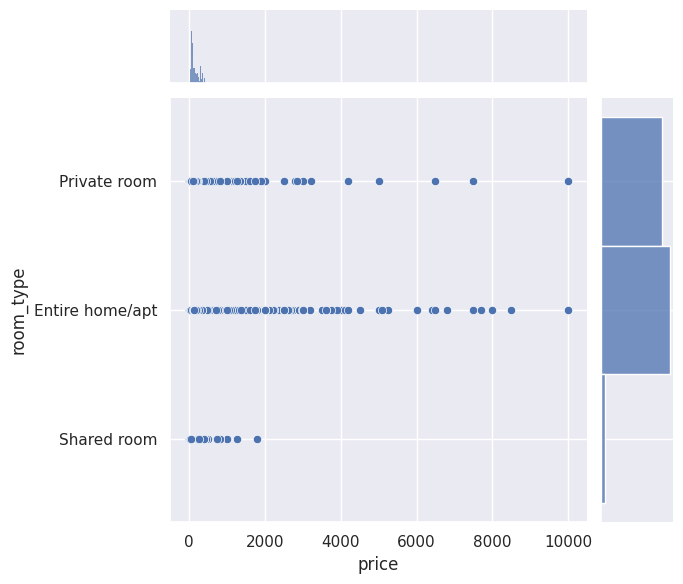

In [ ]:
sns.jointplot(x="price", y=df_AB_NYC_2019["room_type"], data=df_AB_NYC_2019)

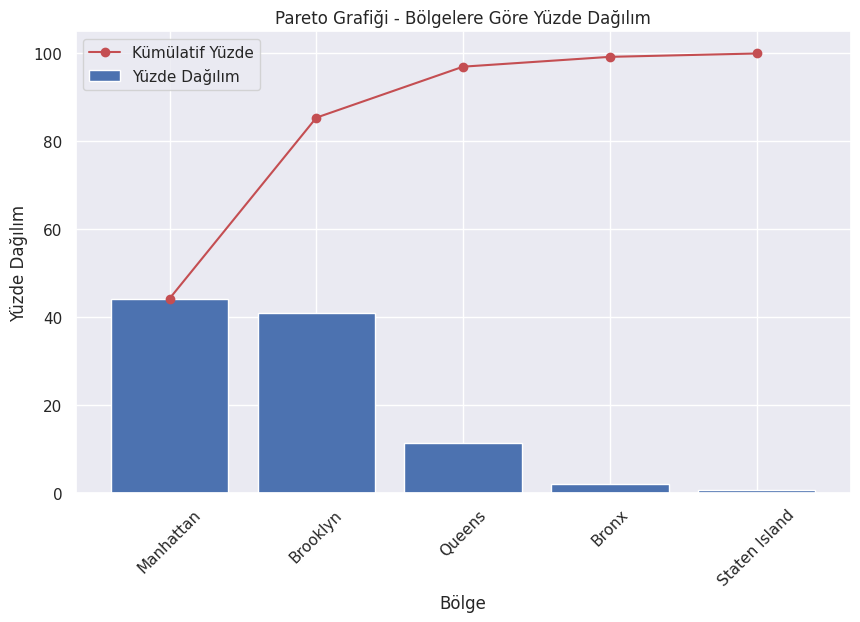

In [ ]:
neighbourhood_counts = df_AB_NYC_2019["neighbourhood_group"].value_counts()
total_count = neighbourhood_counts.sum()
neighbourhood_percentages = (neighbourhood_counts / total_count) * 100
neighbourhood_percentages_sorted = neighbourhood_percentages.sort_values(ascending=False)
cumulative_percentage = neighbourhood_percentages_sorted.cumsum()
plt.figure(figsize=(10, 6))
plt.bar(neighbourhood_percentages_sorted.index, neighbourhood_percentages_sorted)
plt.plot(neighbourhood_percentages_sorted.index, cumulative_percentage, color='r', marker='o')
plt.title("Pareto Grafiği - Bölgelere Göre Yüzde Dağılım")
plt.xlabel("Bölge")
plt.ylabel("Yüzde Dağılım")
plt.xticks(rotation=45)
plt.legend(["Kümülatif Yüzde", "Yüzde Dağılım"], loc='upper left')
plt.show()